#Importing libreries

In [23]:
import os
import numpy
import gymnasium as gym
import matplotlib.pyplot as plt
import random
import numpy as np

#Envirenment observation

In [21]:
env=gym.make('FrozenLake-v1',render_mode='human')


In [210]:
env.observation_space.n

16

In [19]:
env.action_space

Discrete(4)

In [17]:
env.step(0)

(4, 0.0, False, False, {'prob': 0.3333333333333333})

In [22]:
for i in range(5):
    done=False
    state,info=env.reset()
    while not done:
        env.render()
        action=random.randint(0,3)
        new_state,reward,terminated,truncated,_=env.step(action)
        done=truncated or terminated
env.close()
        
        
    

#SARSA

In [198]:
class SARSA:
    
    def __init__(self,alpha,epsilone,gamma,epsilene_learning_rate,eps_num,env) :
        self.alpha=alpha
        self.epsilone=epsilone
        self.epsilene_learning_rate=epsilene_learning_rate
        self.gamma=gamma
        self.eps_num=eps_num
        self.env=env
        self.sarsa_table=np.zeros((env.observation_space.n,env.action_space.n))
        self.rewards_moy=[]
        self.name='Sarsa'
        self.step=self.eps_num/100
    def choose_action(self,state,j):
        if j>1000:
            self.epsilone*=self.epsilene_learning_rate
    
        if j<100:
            return self.env.action_space.sample()

        elif random.uniform(0,1)<self.epsilone or np.sum(self.sarsa_table[state])==0:
            return self.env.action_space.sample()
        else :
            return np.argmax(self.sarsa_table[state])
        
    def train(self):
        for i in range(1,self.eps_num+1):
           

            done=False
            state,info=self.env.reset()
            reward_per_step=[]
            action=self.choose_action(state,i)
            b=False
            while not done:
               
                new_state,reward,truncated,terminated,info=self.env.step(action)
               
                new_action=self.choose_action(new_state,i)
                self.sarsa_table[state,action]+=+self.alpha*(reward+self.gamma*self.sarsa_table[new_state,new_action]-self.sarsa_table[state,action])
                reward_per_step.append(reward)
                done=truncated or terminated
                state=new_state
                action=new_action
                if reward==1:
                    b=True
            if (b):
                print(f'Success for ep {i}')
                
                self.rewards_moy.append(1)
            else:
                
                self.rewards_moy.append(0)
            
        
    def test(self,eps,env1):
        for i in range(eps):
            done=False
            state,info=env1.reset()
            reward_per_step=[]
            while not done:
                env.render()
                action=np.argmax(self.sarsa_table[state])
                new_state,reward,terminated,truncated,_=env1.step(action)
                done=truncated or terminated
                state=new_state
                reward_per_step.append(reward)

            print(np.sum(reward_per_step)/len(reward_per_step))
        env.close()
    def simulate(self):
        times=np.linspace(0,len(self.rewards_moy),len(self.rewards_moy))
        plt.plot(times,self.rewards_moy)
        plt.title('eps_rew_moy')
    
        
        
            
        
        

        

#Q learning

In [199]:
class Q_learning:
    def __init__(self,alpha,epsilone,gamma,epsilene_learning_rate,eps_num,env) :
        self.alpha=alpha
        self.epsilone=epsilone
        self.epsilene_learning_rate=epsilene_learning_rate
        self.gamma=gamma
        self.eps_num=eps_num
        self.env=env
        self.q_learning_table=np.zeros((env.observation_space.n,env.action_space.n))
        self.rewards_moy=[]
        self.name='Q_learning'
        self.step=self.eps_num/100
    def choose_action(self,state,j):
        if j>1000:
            self.epsilone*=self.epsilene_learning_rate
    
        if j<100:
            return self.env.action_space.sample()

        elif random.uniform(0,1)<self.epsilone or np.sum(self.q_learning_table[state])==0:
            self.env.action_space.sample()
            return self.env.action_space.sample()
        else :
            return np.argmax(self.q_learning_table[state])
        
    def train(self):
        for i in range(1,self.eps_num+1):
           

            done=False
            state,info=self.env.reset()
            reward_per_step=[]
            action=self.choose_action(state,i)
            b=False
            while not done:
                
                new_state,reward,truncated,terminated,info=self.env.step(action)
                new_action=self.choose_action(new_state,i)
                self.q_learning_table[state,action]+=+self.alpha*(reward+self.gamma*self.q_learning_table[new_state,new_action]-self.q_learning_table[state,action])
                reward_per_step.append(reward)
                done=truncated or terminated
                state=new_state
                action=new_action
                if reward==1:
                    b=True
            if (b):
                print(f'Success for ep {i}')
                
                self.rewards_moy.append(1)
            else:
                
                self.rewards_moy.append(0)
        
        
    def test(self,eps,env):
        for i in range(eps):
            done=False
            state,info=env.reset()
            reward_per_step=[]
            while not done:
                env.render()
                action=np.argmax(self.q_learning_table[state])
                
                new_state,reward,terminated,truncated,_=env.step(action)
                done=truncated or terminated
                state=new_state
                reward_per_step.append(reward)
            print(np.sum(reward_per_step)/len(reward_per_step))
        env.close()
    def simulate(self):
        times=np.linspace(0,len(self.rewards_moy),len(self.rewards_moy))
        plt.plot(times,self.rewards_moy)
        plt.title('eps_rew_moy')
        plt.show()
    
    
        
        
            
        
        

        

#Compare function

In [208]:
from scipy.interpolate import make_interp_spline

def compare(model1, model2, num_points=100):
    times = np.linspace(0, len(model1.rewards_moy), num_points)

    # Interpolate the rewards for smoother lines
    model1_interp = make_interp_spline(np.arange(len(model1.rewards_moy)), model1.rewards_moy)
    model2_interp = make_interp_spline(np.arange(len(model2.rewards_moy)), model2.rewards_moy)

    # Create smoother reward arrays
    rewards_moy_model1_smooth = model1_interp(times)
    rewards_moy_model2_smooth = model2_interp(times)

    # Plot the first model with a smooth line
    plt.plot(times, rewards_moy_model1_smooth, label=model1.name, color='blue')

    # Plot the second model with a smooth line
    plt.plot(times, rewards_moy_model2_smooth, label=model2.name, color='green')

    # Add legend
    plt.legend()

    # Set title
    plt.title('eps_rew_moy')

    # Show the plot
    plt.show()

# Example usage
# Replace Model1 and Model2 with the actual instances of your classes
# For example:
# compare(Model1(), Model2())


In [169]:
env.close()

#Using SARSA

Success for ep 7
Success for ep 115
Success for ep 133
Success for ep 175
Success for ep 182
Success for ep 183
Success for ep 186
Success for ep 187
Success for ep 189
Success for ep 190
Success for ep 191
Success for ep 193
Success for ep 194
Success for ep 195
Success for ep 196
Success for ep 197
Success for ep 198
Success for ep 199
Success for ep 202
Success for ep 204
Success for ep 205
Success for ep 206
Success for ep 207
Success for ep 208
Success for ep 209
Success for ep 211
Success for ep 213
Success for ep 214
Success for ep 215
Success for ep 216
Success for ep 217
Success for ep 218
Success for ep 219
Success for ep 220
Success for ep 221
Success for ep 222
Success for ep 223
Success for ep 224
Success for ep 225
Success for ep 226
Success for ep 228
Success for ep 229
Success for ep 230
Success for ep 231
Success for ep 233
Success for ep 234
Success for ep 235
Success for ep 237
Success for ep 238
Success for ep 239
Success for ep 240
Success for ep 241
Success for ep

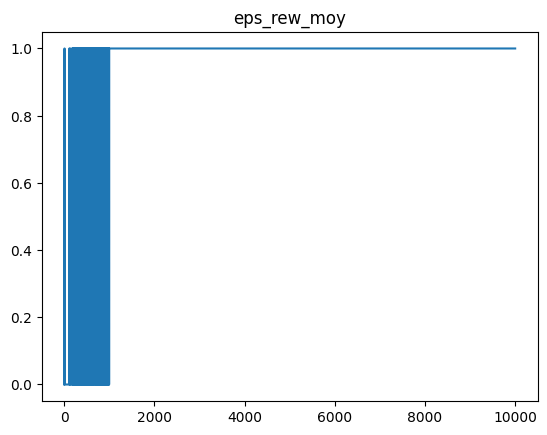

In [200]:
env=gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False)
alpha=0.1
gamma=0.9
epsilone=0.2
epsilone_learning_rate=0.9
eps_num=10000
model1=SARSA(alpha,epsilone,gamma,epsilone_learning_rate,eps_num,env)
model1.train()
model1.simulate()


In [186]:
env=gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False,render_mode='human')

model1.test(5,env)

0.16666666666666666
0.16666666666666666
0.16666666666666666
0.16666666666666666
0.16666666666666666


In [153]:
env.close()

In [187]:
model1.sarsa_table

array([[0.34690534, 0.59049   , 0.28458552, 0.34968686],
       [0.34353963, 0.        , 0.        , 0.        ],
       [0.02133522, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.38674299, 0.6561    , 0.        , 0.34686211],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.26452254, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.4441923 , 0.        , 0.729     , 0.36156271],
       [0.43379319, 0.81      , 0.63010502, 0.        ],
       [0.0610789 , 0.8682253 , 0.        , 0.03518186],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.72172667, 0.9       , 0.48936022],
       [0.66768547, 0.84125245, 1.        , 0.63555256],
       [0.        , 0.        , 0.        , 0.        ]])

#Using Q learning

Success for ep 26
Success for ep 46
Success for ep 70
Success for ep 101
Success for ep 104
Success for ep 106
Success for ep 109
Success for ep 110
Success for ep 111
Success for ep 112
Success for ep 113
Success for ep 114
Success for ep 116
Success for ep 117
Success for ep 118
Success for ep 120
Success for ep 122
Success for ep 123
Success for ep 125
Success for ep 127
Success for ep 128
Success for ep 129
Success for ep 130
Success for ep 131
Success for ep 133
Success for ep 134
Success for ep 135
Success for ep 137
Success for ep 138
Success for ep 139
Success for ep 140
Success for ep 142
Success for ep 143
Success for ep 144
Success for ep 145
Success for ep 148
Success for ep 149
Success for ep 150
Success for ep 152
Success for ep 153
Success for ep 154
Success for ep 155
Success for ep 157
Success for ep 158
Success for ep 159
Success for ep 160
Success for ep 162
Success for ep 163
Success for ep 165
Success for ep 166
Success for ep 167
Success for ep 168
Success for ep 

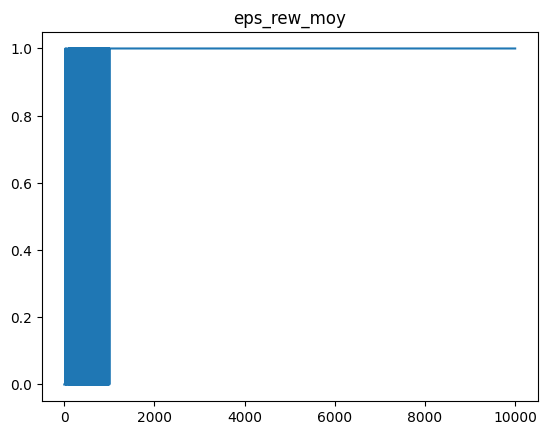

In [201]:
env=gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False)

model2=Q_learning(alpha,epsilone,gamma,epsilone_learning_rate,10000,env)
model2.train()
model2.simulate()

In [193]:
model2.q_learning_table

array([[0.29928282, 0.21594897, 0.59049   , 0.31000972],
       [0.31392047, 0.        , 0.6561    , 0.33912994],
       [0.33644825, 0.729     , 0.34732829, 0.40220886],
       [0.43579851, 0.        , 0.09361595, 0.04226618],
       [0.03374109, 0.07521103, 0.        , 0.3177069 ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.81      , 0.        , 0.43037943],
       [0.        , 0.        , 0.        , 0.        ],
       [0.02872026, 0.        , 0.23041466, 0.02906537],
       [0.        , 0.20450375, 0.70457146, 0.        ],
       [0.56776698, 0.9       , 0.        , 0.48456293],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.06389711, 0.79356319, 0.12351195],
       [0.61423598, 0.83390885, 1.        , 0.69909978],
       [0.        , 0.        , 0.        , 0.        ]])

In [180]:
env=gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False,render_mode='human')

model2.test(5,env)

state:  0
action:  1
state:  4
action:  1
state:  8
action:  2
state:  9
action:  1
state:  13
action:  2
state:  14
action:  2
0.16666666666666666
state:  0
action:  1
state:  4
action:  1
state:  8
action:  2
state:  9
action:  1
state:  13
action:  2
state:  14
action:  2
0.16666666666666666
state:  0
action:  1
state:  4
action:  1
state:  8
action:  2
state:  9
action:  1
state:  13
action:  2
state:  14
action:  2
0.16666666666666666
state:  0
action:  1
state:  4
action:  1
state:  8
action:  2
state:  9
action:  1
state:  13
action:  2
state:  14
action:  2
0.16666666666666666
state:  0
action:  1
state:  4
action:  1
state:  8
action:  2
state:  9
action:  1
state:  13
action:  2
state:  14
action:  2
0.16666666666666666


#Comparing the 2 models

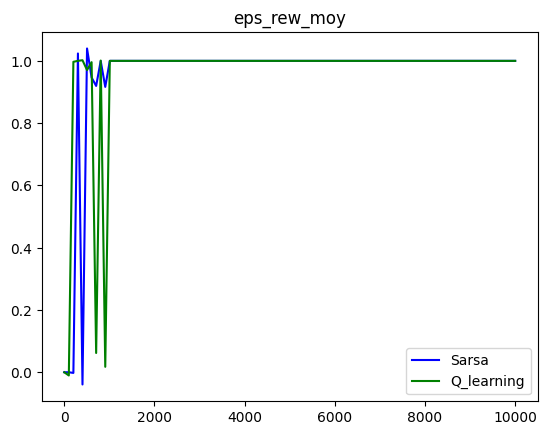

In [209]:
compare(model1,model2)